In [1]:
using Plots
gr()
using FFTW

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for GeometryBasics [5c1252a2-5f33-56bf-86c9-59e7332b4326]
│   exception = Required dependency StructArrays [09ab397b-f2b6-538f-b94a-2f83cf4a842a] failed to load from a cache file.
└ @ Base loading.jl:1055
┌ Warning: Module FixedPointNumbers with build ID 1819184068432351 is missing from the cache.
│ This may mean FixedPointNumbers [53c48c17-4a7d-5ca2-90c5-79b7896eea93] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Colors [5ae59095-9a9b-59fe-a467-6f913c188581]
│   exception = Required dependency FixedPointNumbers [53c48c17-4a7d-5ca2-90c5-79b7896eea93] failed to load from a cache file.
└ @ Base loading.jl:1055
┌ Warning: The call to compilecache failed to create a usable precomp

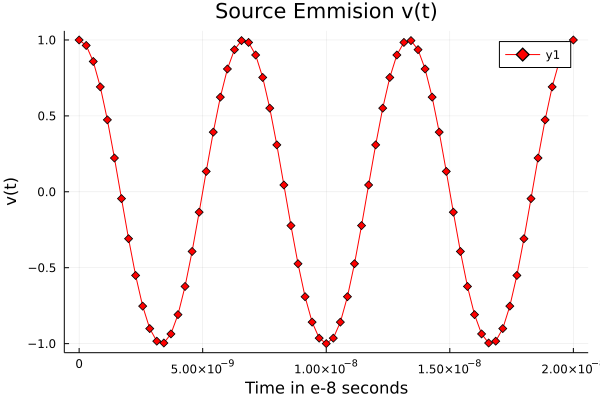

In [2]:
# Signal Emmiter

f0 = 150e6  # 150 MHz
fs = 350e7 # Sampling 300MHz

Δt = 1/fs
t = 0:Δt:3/f0

ω0 = 2*pi*f0;   # rad/s   
A = 1

v = A*cos.(ω0*t);   

plot(t, v ,  color= :red, marker= :d, title="Source Emmision v(t)", ylabel="v(t)", xlabel="Time in e-8 seconds")

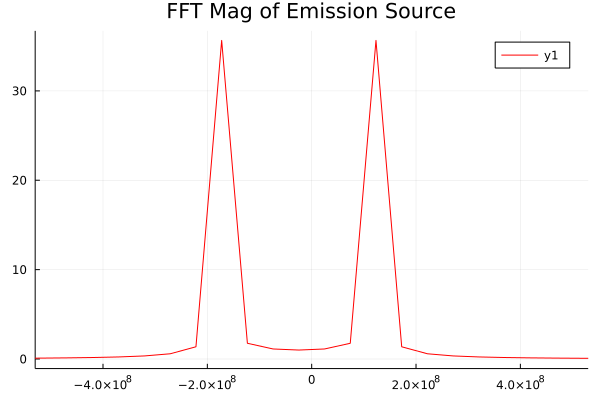

In [3]:
V = fft(v)
magV = fftshift(abs.(V))

N = length(t)
Δf = fs/N
f = -fs/2:Δf:(fs/2-Δf) 

#ylabel("Magnitude")
fftplot = plot(f,magV,color= :red, title="FFT Mag of Emission Source", xlims=[-0.5e9,0.5e9])
display(fftplot)

In [4]:
# Visual Representation of Layout

#Shape
x = [-10:10]
y = [-10:10]
plt.plot(x,y)

# Center
plt.scatter(0,0, c = :blue)

#antennas at -5,-5 & 0,5 & 5,-5
plt.scatter(-5,-5,c = :green)
plt.scatter(0,5,c = :green)
plt.scatter(5,-5,c = :green)

# emitter at 10,10
plt.scatter(25,25,c = :red)

LoadError: UndefVarError: plt not defined

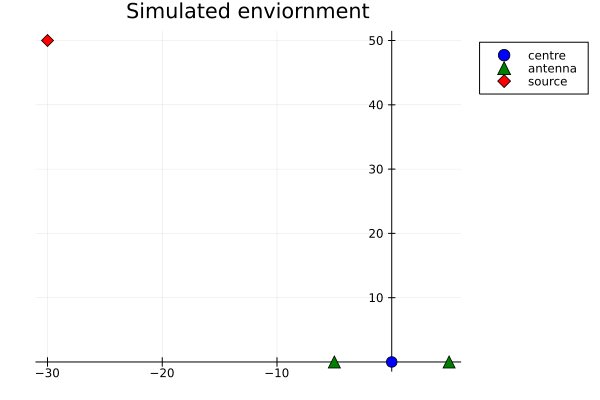

In [16]:
# Center
x = [0]
y = [0]
scatter(x,y, framestyle = :origin, title = "Simulated enviornment", color= :blue, marker= :dot, markersize = 6, label="centre", legend = :outertopright)

# Antenna
x = [5,-5]
y = [0,0]
scatter!(x,y, color= :green, marker= :utriangle, markersize = 6, label="antenna")

# Source
x = [-30]
y = [50]
scatter!(x,y, color= :red, marker= :d, markersize = 6, label="source")

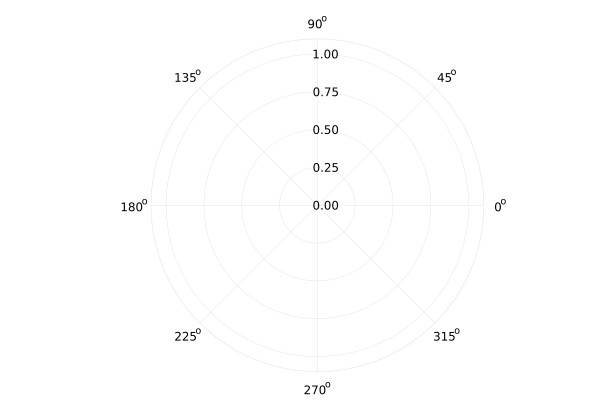

In [6]:
#rotation = 90
plot(proj=:polar, m=2)